In [39]:
import sys
import torch
import numpy as np
from functools import partial
sys.path.append("..")

from CPPN import NN
from CPPN import ColorFactory
from CPPN import plot_input

In [40]:
SIZE_X = 256
SIZE_Y = 256
LAYERS = 16
NEURONS = 16
OUTPUT_SIZE = 3

paint_net = NN(input_size=2,
               n_neurons=NEURONS,
               n_layers=LAYERS,
               output_size=OUTPUT_SIZE)

In [41]:
factory = ColorFactory()

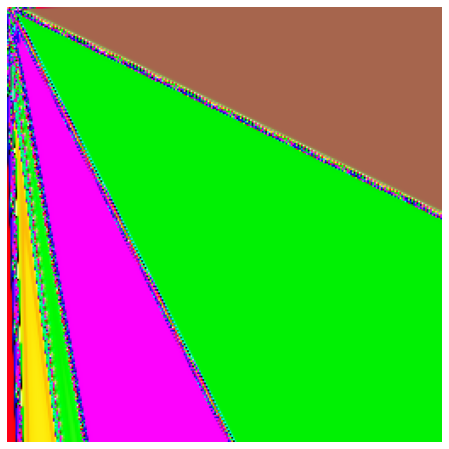

In [42]:
img = factory.generate(pattern='simple', 
                       size_x=SIZE_X, 
                       size_y=SIZE_Y,
                       scale=1)

paint = paint_net(torch.tensor(img).type(torch.FloatTensor))
plot_image(paint, SIZE_X, SIZE_Y)

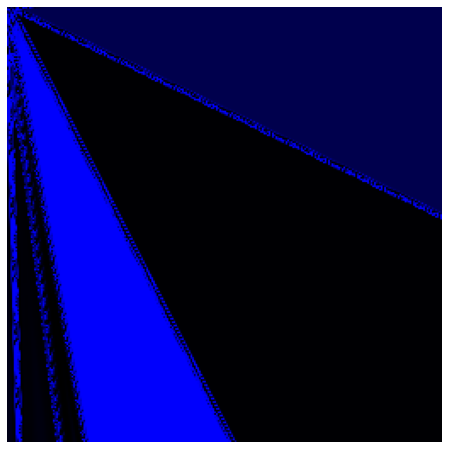

In [43]:
# Now we created the target to learn, the same image but blueish

target_paint = paint
target_paint[:,0]=0.
target_paint[:,1]=0.

plot_image(target_paint,256,256)

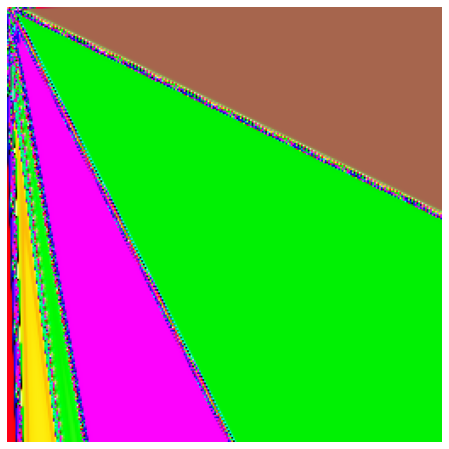

loss:  tensor(0.2821)


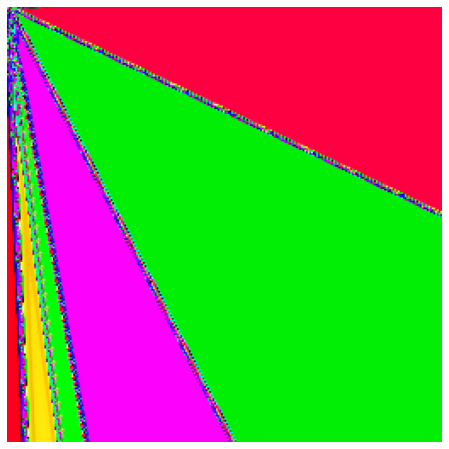

loss:  tensor(0.3162)


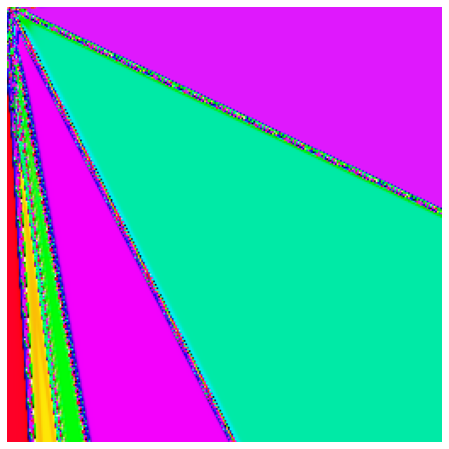

loss:  tensor(0.3917)


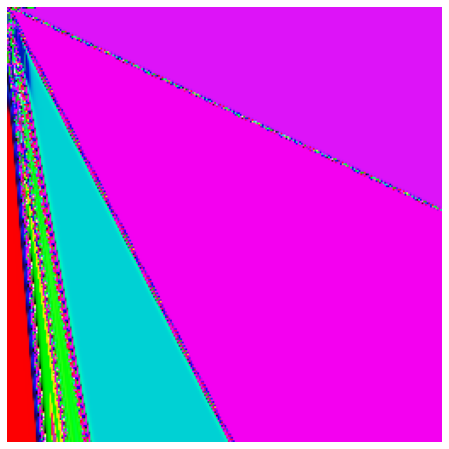

loss:  tensor(0.4621)


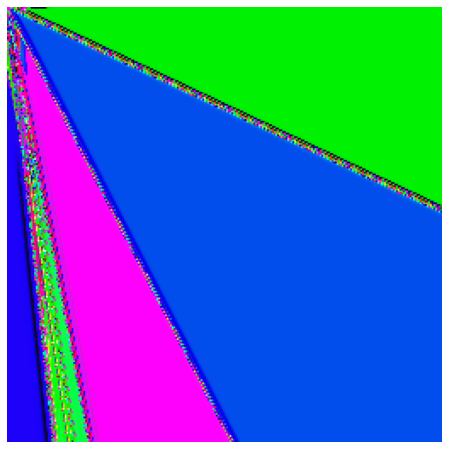

loss:  tensor(0.3086)


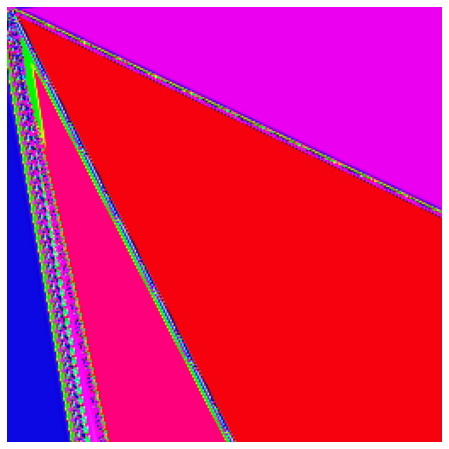

loss:  tensor(0.3461)


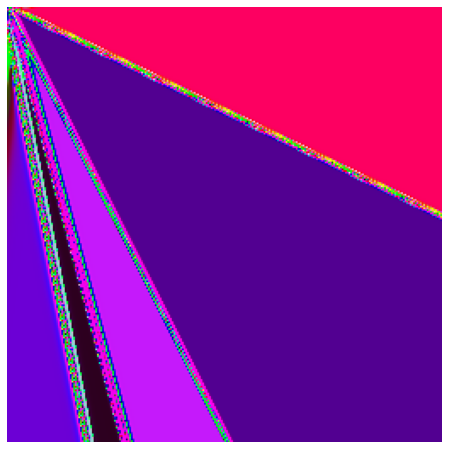

loss:  tensor(0.2168)


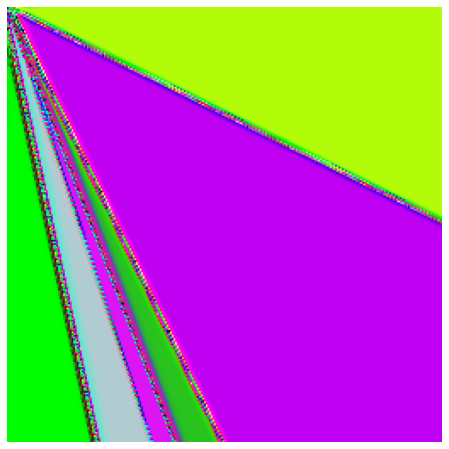

loss:  tensor(0.4550)


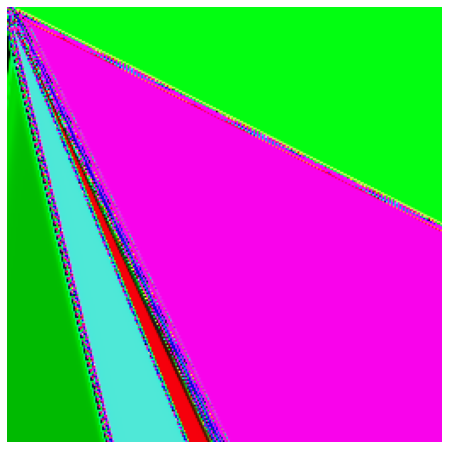

loss:  tensor(0.4580)


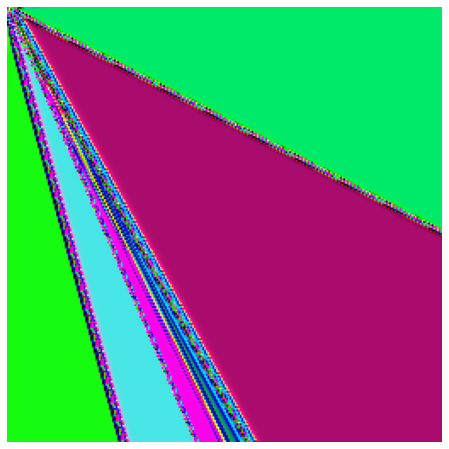

loss:  tensor(0.2765)


In [44]:
# Train the net to learn the new image

source = img
target = target_paint

callback_plot = partial(plot_image,size_x=256,size_y=256)
learned_paint = paint_net.train(source, target, 10, callback_plot)